# Settings

In [2]:
%matplotlib inline
from ppclass import pp
import matplotlib.pyplot as mpl
mpl.rcParams['font.family'] = "times" # for good log major/minor ticks
mpl.rcParams['lines.linewidth'] = 3.0

### Set zonal-mean pressure-level interpolated file

In [3]:
ini = pp()
ini.quiet = True
ini.file = "/home/aspiga/data/dynamico-giant/tprecast_999.nc"
ini.x = 999
ini.useindex = "1000"
ini.ndiv = 50
ini.title = ""

### Set time. Outputs in file are each 500 days

In [4]:
dayperyear = 24430.
secondperday = 38052.
outputfreq = 500.
deltafile = outputfreq / dayperyear
print deltafile

0.0204666393778


### Set tropo. Set evolution plots.

In [5]:
tropo = pp() ; tropo << ini
tropo.z = 8.e4
mbar = int(tropo.z/100.)

In [6]:
evo = pp() ; evo << tropo
evo.xp, evo.yp = 20, 12
evo.xcoeff = deltafile
evo.xlabel = "simulated Saturn years"
evo.nxticks, evo.nyticks = 15, 15
evo.xmax = 15
evo.ymin, evo.ymax = -75,75
evo.ylabel = "Latitude"
evo.div = 50

# Plots

## Section :  zonal wind

In [7]:
def roughindex(ls,year):
    ## this is the year_th simulated year
    return int(((year-1)*49.) + (ls*49./360.))

637 686


/home/aspiga/soft/planetoplot/modules/ppclass.py:1854: RuntimeWarning: invalid value encountered in greater
  self.field = self.f.variables[self.var][tupledim]
/home/aspiga/soft/planetoplot/modules/ppclass.py:1944: RuntimeWarning: invalid value encountered in greater_equal
  masked = np.ma.masked_where(np.abs(self.field) >= self.missing,self.field)
/home/aspiga/soft/planetoplot/modules/ppplot.py:290: RuntimeWarning: invalid value encountered in less
  if zevmin < 0: what_I_plot[ what_I_plot < zevmin*(1.-small_enough) ] = zevmin*(1.-small_enough)
/home/aspiga/soft/planetoplot/modules/ppplot.py:292: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > miss  ] = -miss
/home/aspiga/soft/planetoplot/modules/ppplot.py:293: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > zevmax ] = zevmax*(1.-small_enough)
/home/aspiga/soft/planetoplot/modules/ppplot.py:258: RuntimeWarning: invalid value encountered in less
  ind = np.where(np.abs

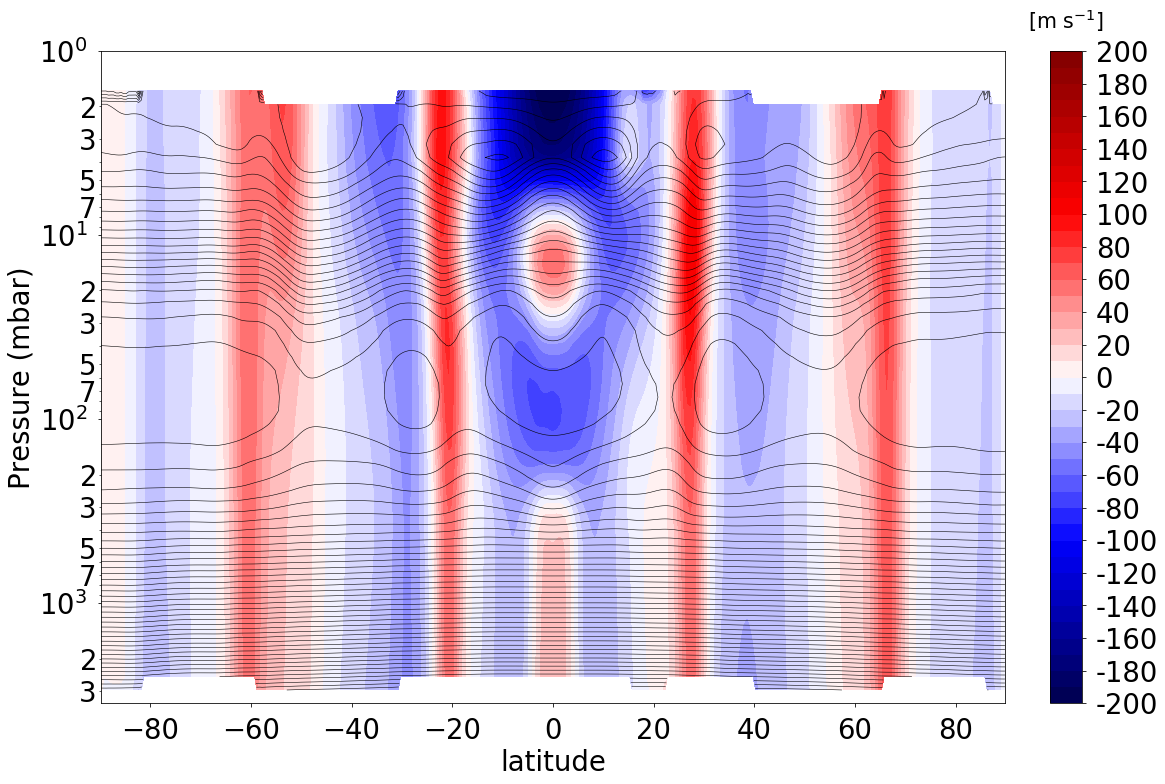

In [8]:
year = 14 #11
st = roughindex(0.,year)
en = roughindex(360.,year)
print st,en
###
section = pp() ; section << ini
section.xp, section.yp = 20, 12
section.var = ["u","temperature"]
section.vargoal = ["main","contour"]
section.colorbar = "seismic"
section.vmin, section.vmax, section.div  = -200., 200., 40
section.fmt = "%.0f"
section.t = "%i,%i" % (st,en)
section.logy = True
section.ycoeff = 1./100.
section.ylabel = "Pressure (mbar)"
section.getplot()
section.filename = "section"
section.out = "pdf" ; m = section.plot() ; section.out = None
section.out = "png" ; section.res = 300 ; m = section.plot() ; section.out = None

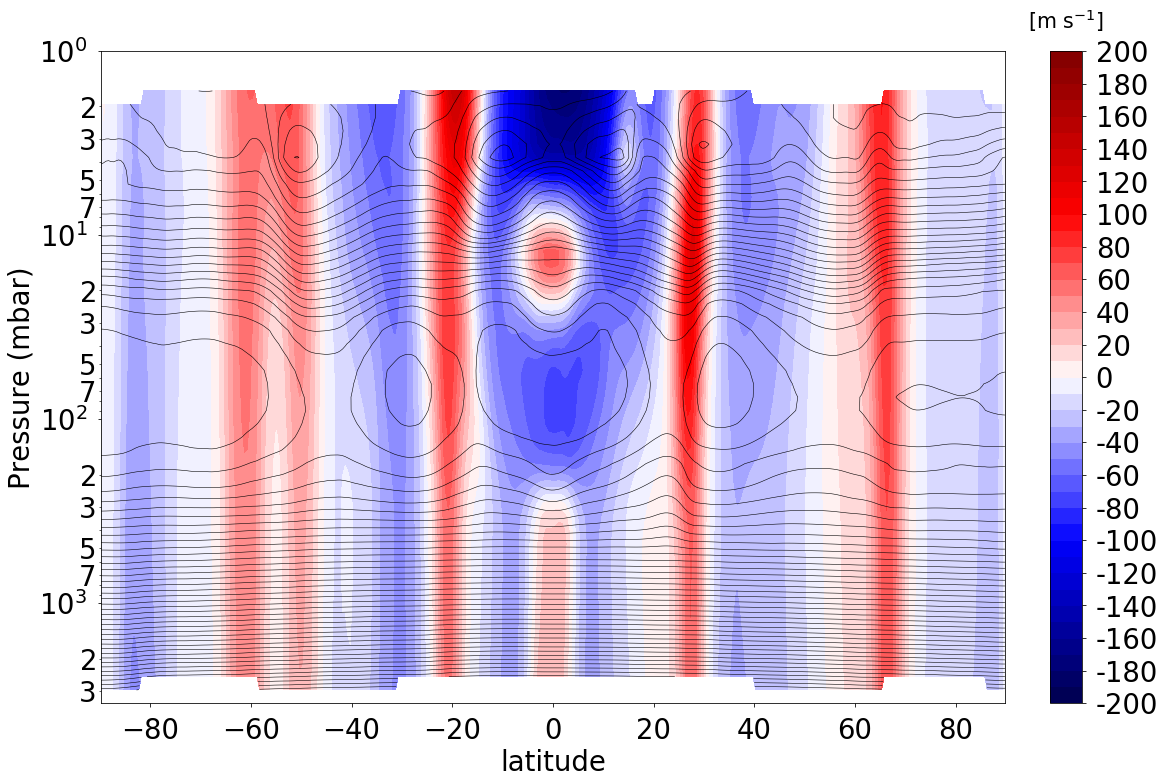

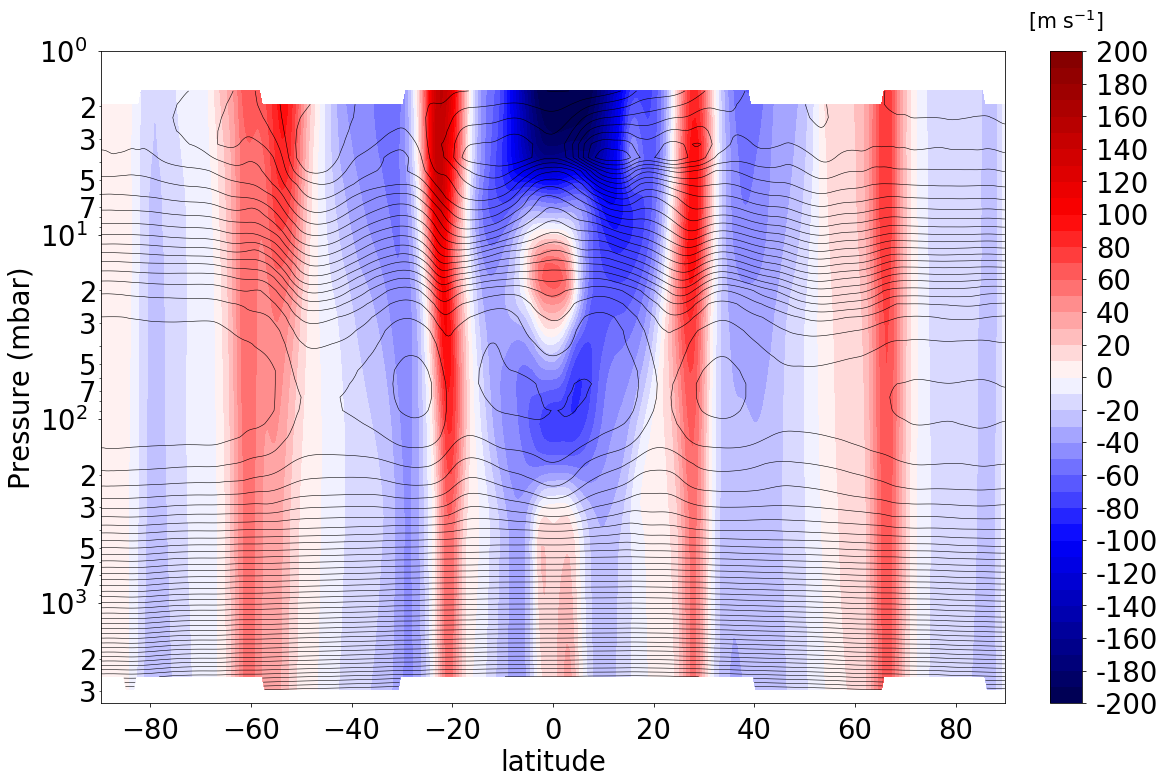

In [9]:
year = 14 #11
st = roughindex(90.,year)
en = roughindex(180.,year)
for tt in [str(st),str(en)]:
    section.t = tt #[str(st),str(en)] # ~ solstice then equinox
    section.getplot()
    section.filename = "section_season_%s" % (tt)
    section.out = "pdf" ; m = section.plot() ; section.out = None
    section.out = "png" ; section.res = 300 ; m = section.plot() ; section.out = None

## Section :  eddy momentum flux

0 735


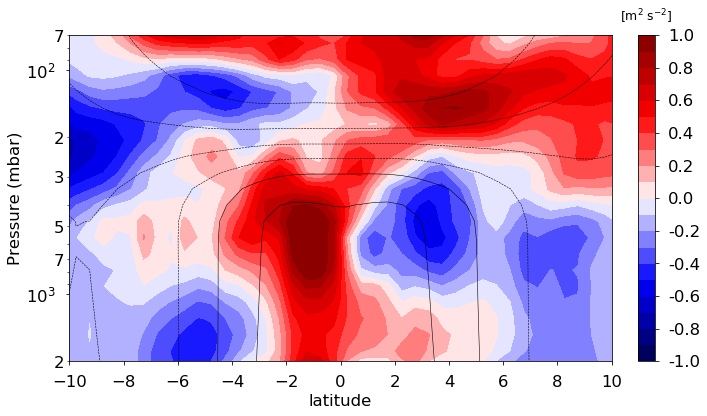

In [10]:
st = roughindex(0.,1)
en = roughindex(360.,15)
print st,en
###
section = pp() ; section << ini
section.var = ["vpup","u"]
section.vargoal = ["main","contour"]
section.xp, section.yp = 12, 6
section.logy = True
section.ycoeff = 1./100.
section.ylabel = "Pressure (mbar)"
section.t = '%i,%i' % (st,en)
section.ymax, section.ymin = 70., 2000.
section.xmin, section.xmax = -10., 10.
section.vmin, section.vmax, section.div  = -1, 1, 20
section.fmt = '%.1f'
section.colorbar = "seismic"
section.units = r'm$^2$ s$^{-2}$'
section.getplot()
section.filename = "section_eqsuper"
section.out = "pdf" ; m = section.plot() ; section.out = None
section.out = "png" ; section.res = 300 ; m = section.plot() ; section.out = None

## Evolution : zonal wind

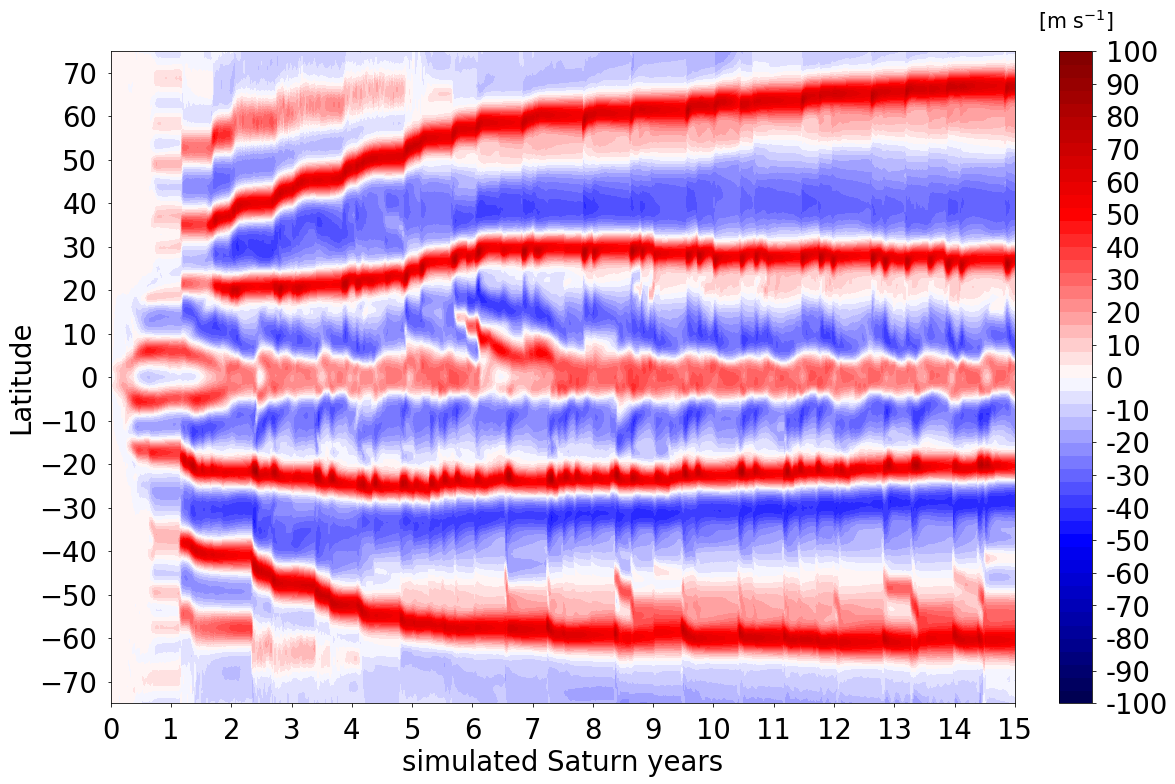

In [11]:
u = pp() ; u << evo
u.var = "u"
u.title = ""
u.colorbar = "seismic"
u.fmt = "%.0f"
u.vmin, u.vmax = -100.,100.
m = u.getplot()
u.filename = "jetevolution"
u.out = "pdf" ; m = u.plot() ; u.out = None
u.out = "png" ; u.res = 300 ; m = u.plot() ; u.out = None

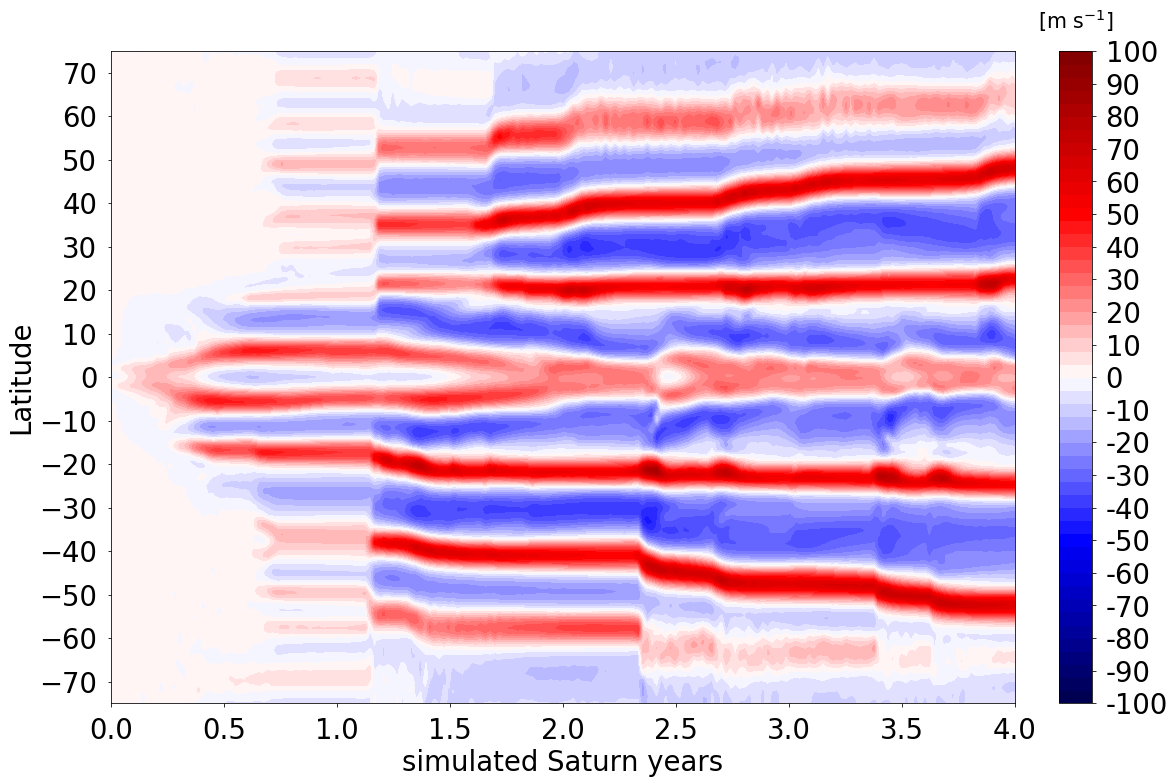

In [12]:
u = pp() ; u << evo
u.var = "u"
u.title = ""
u.colorbar = "seismic"
u.fmt = "%.0f"
u.vmin, u.vmax = -100.,100.
u.xmin, u.xmax, u.nxticks = 0,4,8
m = u.getplot()
u.filename = "jetevolution_beginning"
u.out = "pdf" ; m = u.plot() ; u.out = None
u.out = "png" ; u.res = 300 ; m = u.plot() ; u.out = None

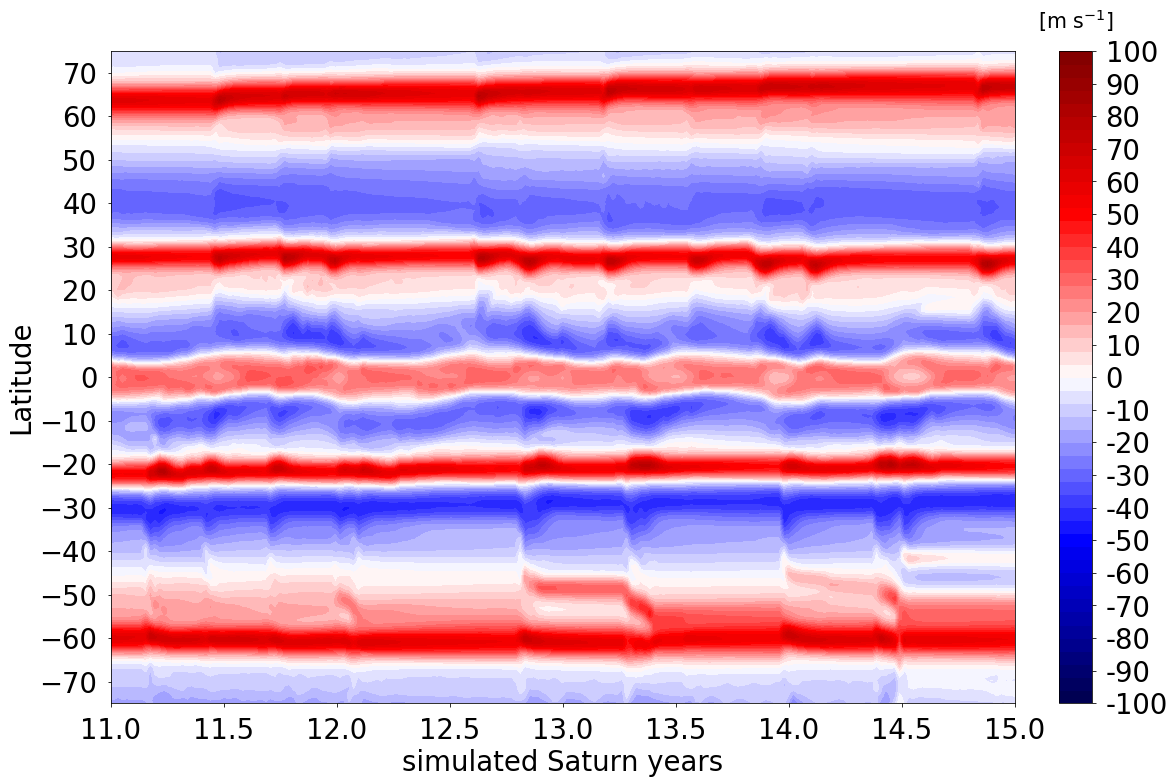

In [13]:
u = pp() ; u << evo
u.var = "u"
u.title = ""
u.colorbar = "seismic"
u.fmt = "%.0f"
u.vmin, u.vmax = -100.,100.
u.xmin, u.xmax, u.nxticks = 11,15,8
m = u.getplot()
u.filename = "jetevolution_end"
u.out = "pdf" ; m = u.plot() ; u.out = None
u.out = "png" ; u.res = 300 ; m = u.plot() ; u.out = None

## Evolution : eddy activity

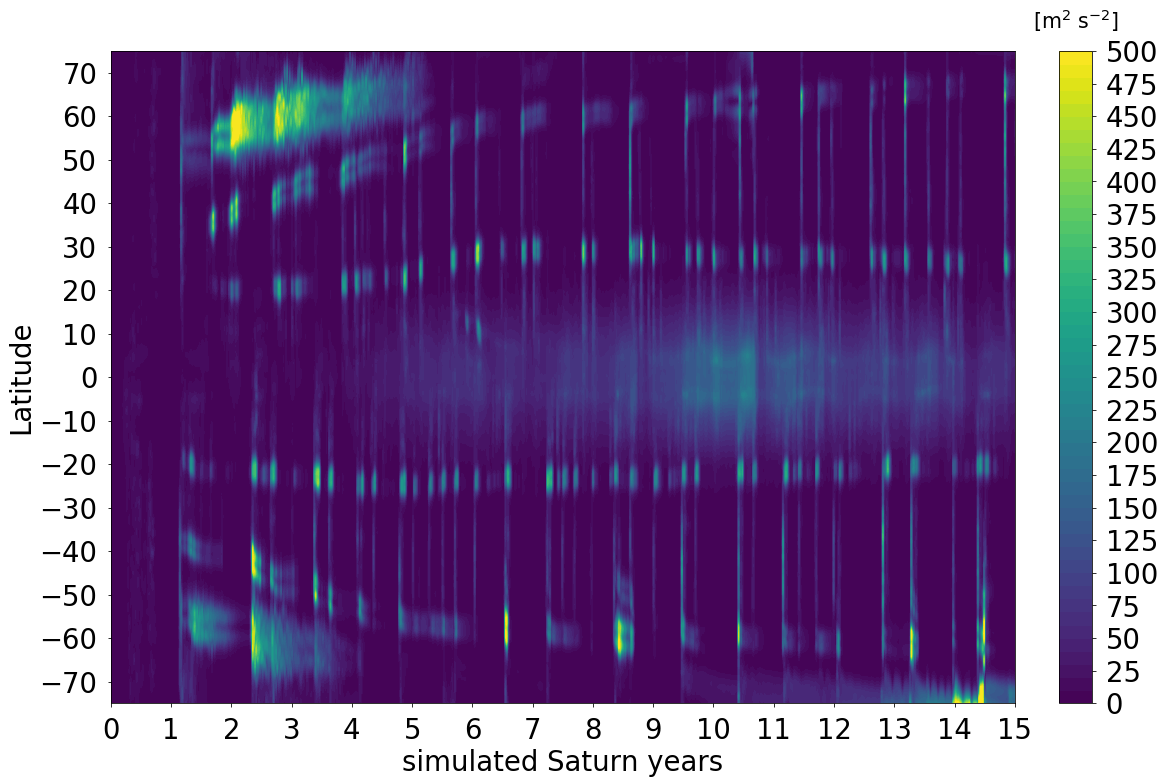

In [14]:
eke = pp() ; eke << evo
eke.var = "eke"
eke.colorbar = "viridis"
eke.fmt = "%.0f"
eke.vmin, eke.vmax = 0.,500.
eke.units = r'm$^{2}$ s$^{-2}$'
m = eke.getplot()
eke.filename = "ekeevolution"
eke.out = "pdf" ; m = eke.plot() ; eke.out = None
eke.out = "png" ; eke.res = 300 ; m = eke.plot() ; eke.out = None

## Evolution : diagnostics for instabilities

Do it at tropopause otherwise baroclinic not defined

In [15]:
evo.z = 1.e4

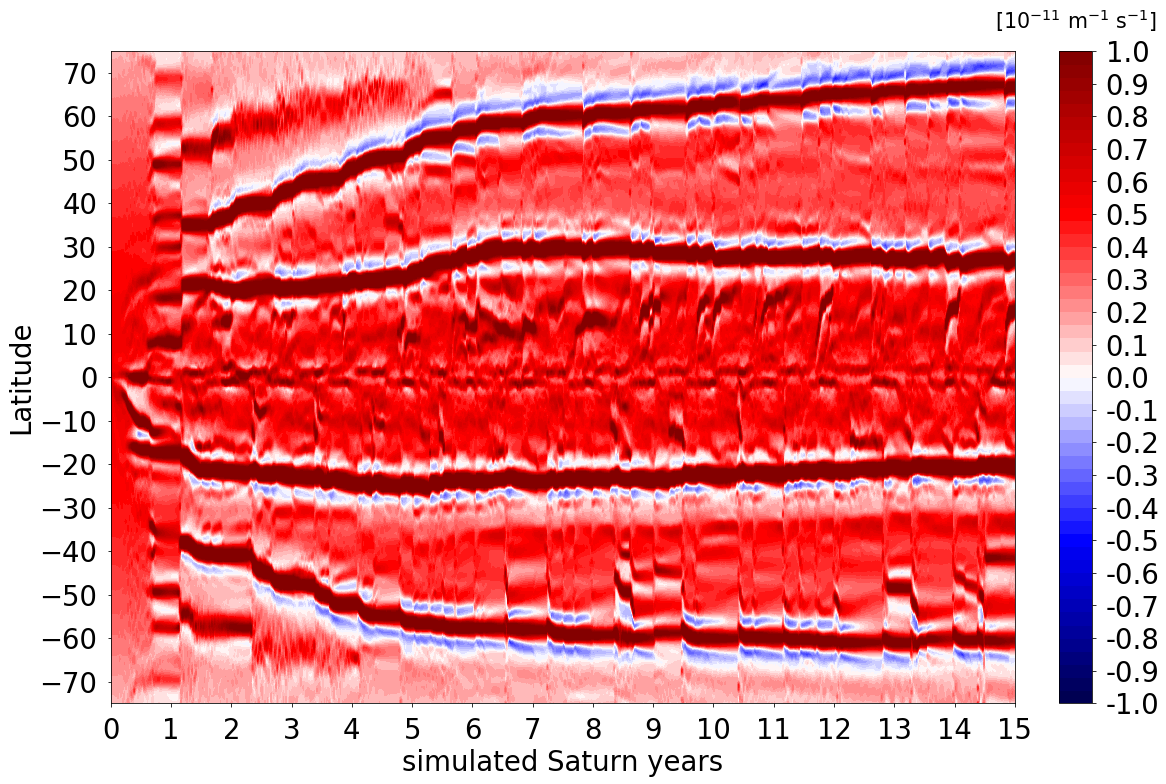

In [16]:
barot = pp() ; barot << evo
barot.var = "effbeta_bt"
barot.units = r'$10^{-11}$ m$^{-1}$ s$^{-1}$'
barot.vmin, barot.vmax = -1.,1.
barot.fmt = "%.1f"
barot.colorbar = "seismic"
barot.get()
barot = barot * 1e11
m = barot.plot()
barot.filename = "effbeta_bt"
barot.out = "pdf" ; m = barot.plot() ; barot.out = None 
barot.out = "png" ; barot.res = 300 ; m = barot.plot() ; barot.out = None

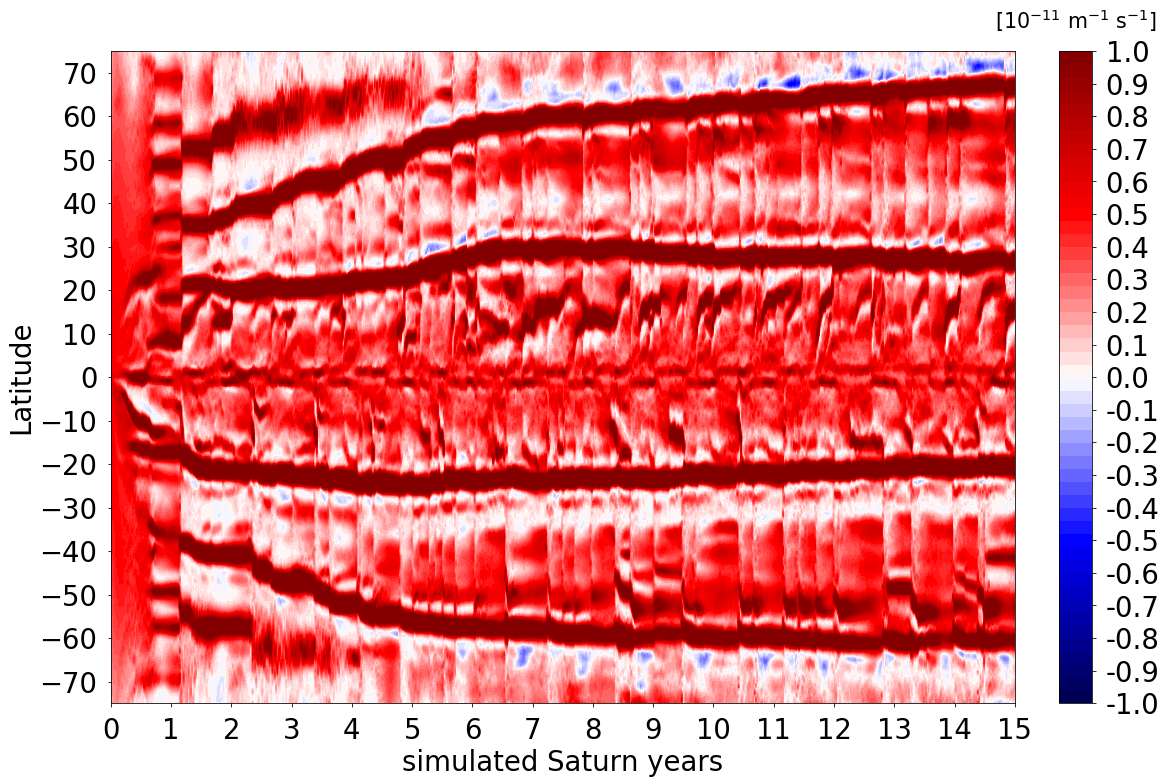

In [17]:
baroc = pp() ; baroc << evo
baroc.var = "effbeta_bc"
baroc.units = r'$10^{-11}$ m$^{-1}$ s$^{-1}$'
baroc.vmin, baroc.vmax = -1.,1.
baroc.fmt = "%.1f"
baroc.colorbar = "seismic"
baroc.get()
baroc = baroc * 1e11
m = baroc.plot()
baroc.filename = "effbeta_bc"
baroc.out = "pdf" ; m = baroc.plot() ; baroc.out = None
baroc.out = "png" ; baroc.res = 300 ; m = baroc.plot() ; baroc.out = None

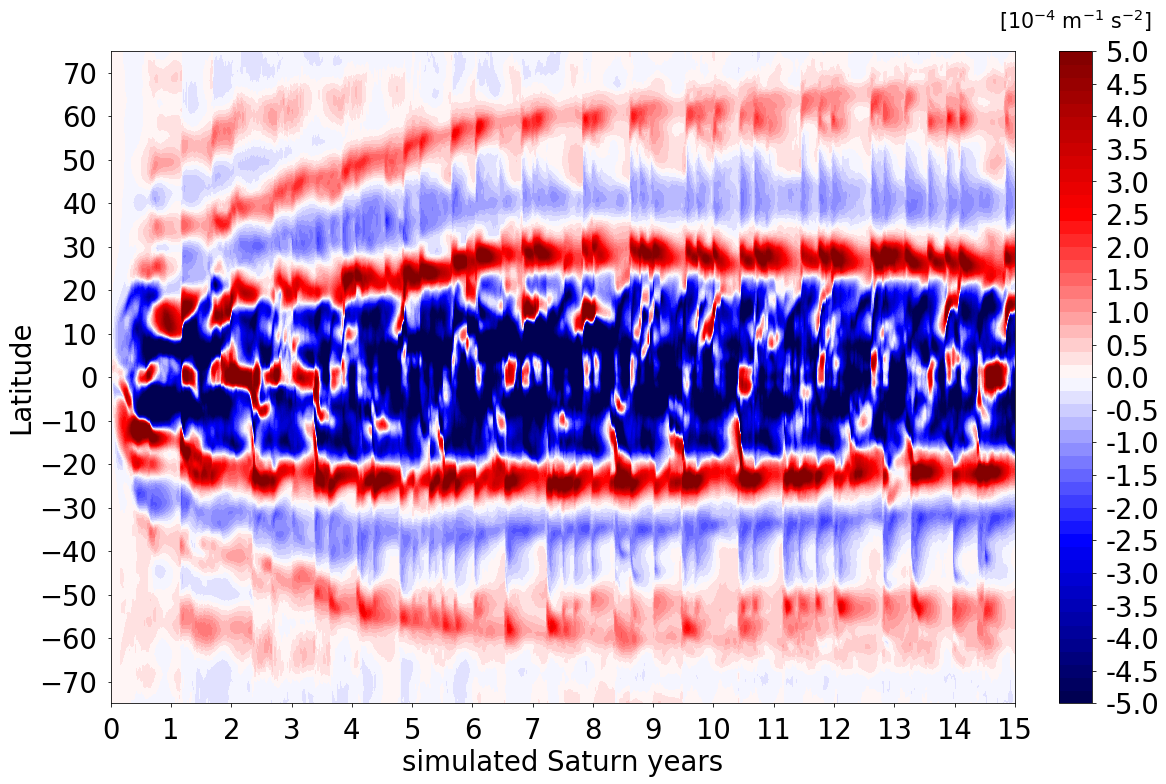

In [18]:
csp3 = pp() ; csp3 << evo
csp3.var = "ushear"
csp3.units = r'$10^{-4}$ m$^{-1}$ s$^{-2}$'
csp3.vmin = -5
csp3.vmax = +5
csp3.fmt = "%.1f"
csp3.colorbar = "seismic"
csp3.get()
csp3 = csp3 * 1e4
m = csp3.plot()
csp3.filename = "ushear"
csp3.out = "pdf" ; m = csp3.plot() ; csp3.out = None
csp3.out = "png" ; csp3.res = 300 ; m = csp3.plot() ; csp3.out = None

## Evolution : zoom : migration

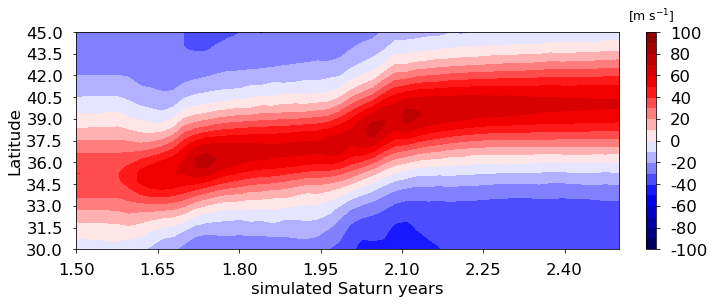

In [19]:
mig = pp() ; mig << u
mig.z = 2e4
mig.xp, mig.yp = 12, 4
mig.ymin, mig.ymax, mig.nyticks = 30, 45, 10
mig.div = 20
mig.xmin, mig.xmax = 1.5, 2.5
m = mig.getplot()
mig.filename = "migration"
mig.out = "pdf" ; m = mig.plot() ; mig.out = None
mig.out = "png" ; mig.res = 300 ; m = mig.plot() ; mig.out = None

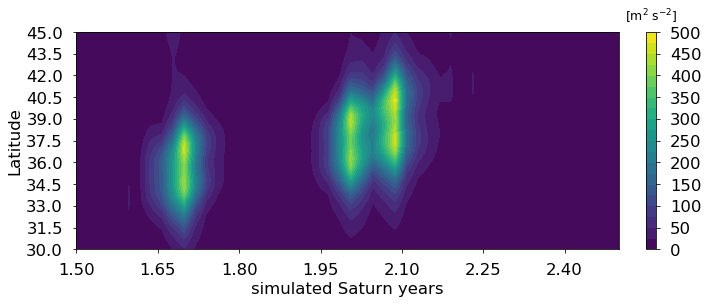

In [20]:
mig.var = "eke"
mig.vmin, mig.vmax = 0., 500.
mig.colorbar = "viridis"
mig.units = r'm$^{2}$ s$^{-2}$'
m = mig.getplot()
mig.filename = "migrationeke"
mig.out = "pdf" ; m = mig.plot() ; mig.out = None 
mig.out = "png" ; mig.res = 300 ; m = mig.plot() ; mig.out = None

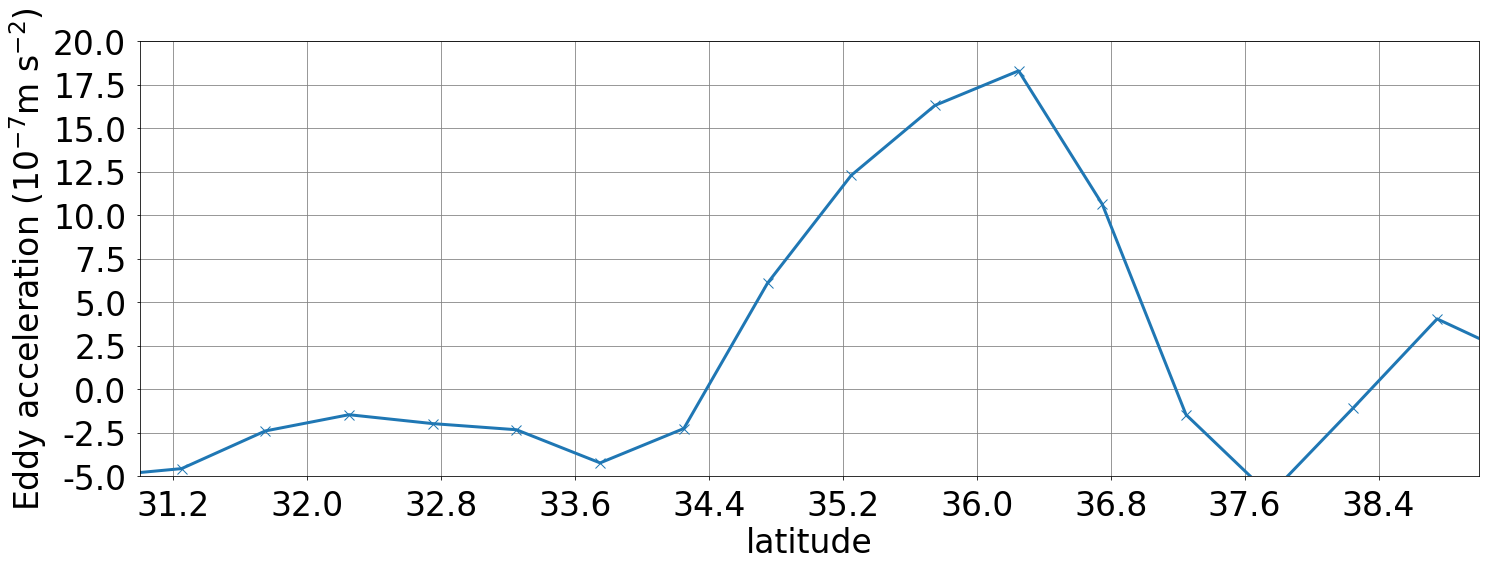

In [21]:
integ = pp() ; integ << ini
integ.xp = 24
integ.yp = 8
integ.var = "edddudt"
integ.vargoal = "main"
one = 1.5 / deltafile
two = 1.8 / deltafile
integ.t = str(one) + "," + str(two)
integ.z = 2.e4 
integ.ymin, integ.ymax = -5,20
integ.xmin, integ.xmax = 31., 39.
integ.fmt = "%.1f"
integ.ylabel = r'Eddy acceleration ($10^{-7} $m s$^{-2}$)'
integ.get()
integ = integ * 1e7
integ.plot()
integ.filename = "migration_edddudt"
integ.out = "pdf" ; m = integ.plot() ; integ.out = None
integ.out = "png" ; integ.res = 300 ; m = integ.plot() ; integ.out = None

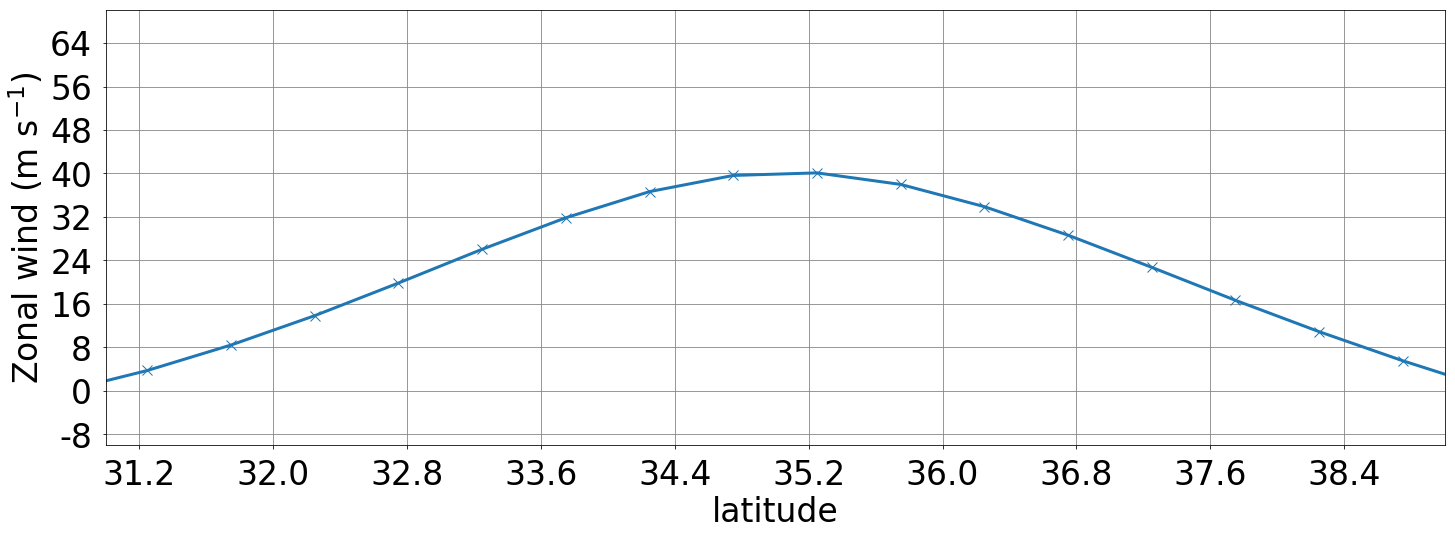

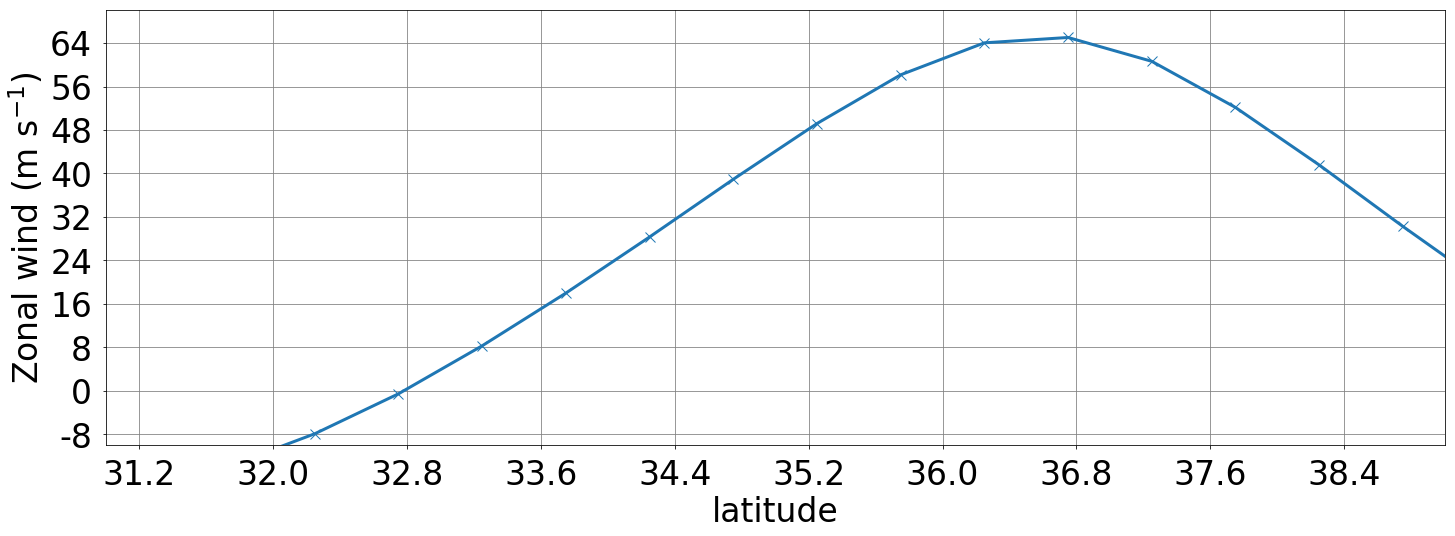

In [22]:
integ.t = str(one)
#integ.superpose = True
integ.var = "u"
integ.ylabel = r'Zonal wind (m s$^{-1}$)'
integ.ymin, integ.ymax = -10., 70.
integ.fmt = "%.0f"
m = integ.getplot()
integ.filename = "migration_before"
integ.out = "pdf" ; m = integ.plot() ; integ.out = None
integ.out = "png" ; integ.res = 300 ; m = integ.plot() ; integ.out = None
##
integ.t = str(two)
m = integ.getplot()
integ.filename = "migration_after"
integ.out = "pdf" ; m = integ.plot() ; integ.out = None
integ.out = "png" ; integ.res = 300 ; m = integ.plot() ; integ.out = None

# Eddy-to-mean conversion (del Genio)

In [23]:
dalist = []
for nnn in range(14):     
    one, two = nnn+1, nnn+2
    one = one / deltafile
    two = two / deltafile
    dalist.append(str(one)+","+str(two))
print dalist
print len(dalist)

['48.86,97.72', '97.72,146.58', '146.58,195.44', '195.44,244.3', '244.3,293.16', '293.16,342.02', '342.02,390.88', '390.88,439.74', '439.74,488.6', '488.6,537.46', '537.46,586.32', '586.32,635.18', '635.18,684.04', '684.04,732.9']
14


In [24]:
colorm = "magma" #"brg" #"magma"
from matplotlib.cm import get_cmap
import numpy as np
pal = get_cmap(name=colorm)
coltab = [pal(i) for i in np.linspace(0,0.9,len(dalist))]

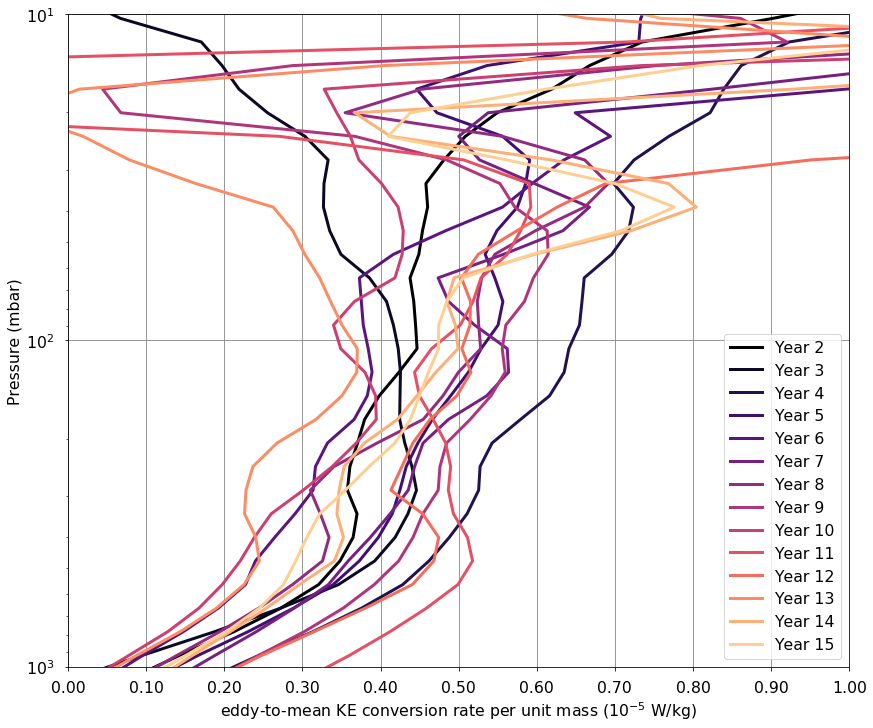

In [25]:
delg = pp() ; delg << ini
delg.xp = 14
delg.yp = 12
delg.t = dalist
delg.superpose = True
##
delg.var = "EtoM"
delg.y = "20,60" # DG 2007
delg.y = "-60,60" # DG B 2012 1.2 10^-5 W/kg (see Figure 11 upper right)
delg.logy = True
delg.fmt = "%.2f"
delg.xcoeff, delg.ycoeff = 1.e5, 1./100.
delg.xmin, delg.xmax, delg.nxticks = 0., 1., 10
delg.ymin, delg.ymax = 1.e3, 10
delg.ylabel = r'eddy-to-mean KE conversion rate per unit mass ($10^{-5}$ W/kg)'
delg.xlabel = r'Pressure (mbar)'
delg.marker = ""
delg.getdefineplot()
count = 1
for zeplot in delg.p:
    zeplot.color = coltab[count-1]
    count += 1
    zeplot.legend = 'Year '+str(count)
m = delg.makeplot()
##
delg.filename = "delgenio"
delg.out = "pdf"
delg.getdefineplot()
count = 1
for zeplot in delg.p:
    zeplot.color = coltab[count-1]
    count += 1
    zeplot.legend = 'Year '+str(count)
m = delg.makeplot()
delg.out = None